### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [13]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization
import tensorflow
import matplotlib.pyplot as plt
# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tensorflow.__version__)

2.9.0


In [2]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000
# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

# look at the data
print('---review---')
print(xTrain[123])
print('---label---')
print(yTrain[123])

# look at the respective words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in xTrain[123]])


# other related dataset already in tensorflow:  reuters newswire classification dataset
# see https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/reuters

17464789/17464789 [==============================] - 1s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]
---label---
1
1641221/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'version', 'to', 'date', 'on', 'list', 'draw', 'him', 'critical', 'very', 'love', 'to', 'by', 'br', 'of', 'its', 'tony', 'characters', 'was', 'one', 'life', 'this', 'is', 'go', 'was', 'best', 'least', 'should', 'so', 'done', 'result', 'no', 'was', 'with', 'this', 'understood', 'only', 'war', "couldn't", 'that', 'her', 'get', 'would', 'johnny', 'we', 'in', 'and', 'are', 'to', 'business', 'that', 'her', 'because', 'story', 'use', 'movies']


In [9]:
imdb

<module 'keras.api._v2.keras.datasets.imdb' from 'C:\\Users\\Felix Lahnsteiner\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\imdb\\__init__.py'>

In [3]:
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(xTrain, key=len))))
print('Maximum test review length: {}'.format(len(max(xTest, key=len))))
print('Minimum train review length: {}'.format(len(min(xTrain, key=len))))
print('Minimum test review length: {}'.format(len(min(xTest, key=len))))

Maximum train review length: 2494
Maximum test review length: 2315
Minimum train review length: 11
Minimum test review length: 7


In [4]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 1000
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [5]:
# setup the neural network architecture
# check out the respective tensorflow help page: https://www.tensorflow.org/guide/keras/rnn
model=Sequential()

# define size of embedding, see https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/Embedding
# optional: use a different embedding like word2vec or other options available within tensorflow 
embeddingSize = 128
model.add(Embedding(vocabularySize, embeddingSize, input_length=maxWords))

# add recurrent layers: 
# e.g. a SimpleRNN (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/SimpleRNN) with
# LayerNormalization (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/LayerNormalization)
model.add(SimpleRNN(100))
model.add(LayerNormalization())

# add layer for output
model.add(Dense(1, activation='sigmoid'))

# print model and check number of parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               22900     
                                                                 
 layer_normalization (LayerN  (None, 100)              200       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 663,201
Trainable params: 663,201
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# set parameters for network training
batchSize = 64
numEpochs = 5

# train your model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/5
390/390 [==============================] - 331s 845ms/step - loss: 0.6840 - accuracy: 0.5622 - val_loss: 0.6733 - val_accuracy: 0.4531
Epoch 2/5
390/390 [==============================] - 332s 851ms/step - loss: 0.5482 - accuracy: 0.7160 - val_loss: 0.5697 - val_accuracy: 0.7344
Epoch 3/5
390/390 [==============================] - 359s 920ms/step - loss: 0.5173 - accuracy: 0.7405 - val_loss: 0.6271 - val_accuracy: 0.6719
Epoch 4/5
390/390 [==============================] - 447s 1s/step - loss: 0.4216 - accuracy: 0.8042 - val_loss: 0.4188 - val_accuracy: 0.8281
Epoch 5/5
390/390 [==============================] - 447s 1s/step - loss: 0.3210 - accuracy: 0.8657 - val_loss: 0.3987 - val_accuracy: 0.8125
Test accuracy: 0.8095999956130981


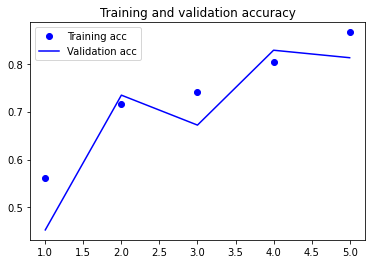

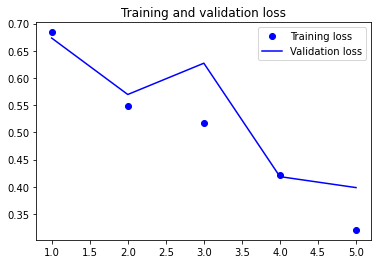

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()